---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Project Name (replace with your project name)

> Indented block


Project description (replace with your project description, you can use the same from the `INFO.md` file.

### Project Repo 
link (replace if you have your own repo, otherwise delete)

## Participants:
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester
Add here in which course and in which semester it was done.

### License
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

### Colab Setup

In [45]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/drive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/Time_series_ML"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
  !pwd

  !pip install -r requirements.txt
  !sudo apt-get install nano
  !cp -f ./resources/cws.py /usr/local/lib/python3.8/dist-packages/scaleogram
  !sudo apt-get autoremove


  from IPython.display import JSON
  from google.colab import output
  from subprocess import getoutput
  import os
  
  #@title jQuery Terminal's [Features](https://terminal.jcubic.pl/)

  def shell(command):
    if command.startswith('cd'):
      path = command.strip().split(maxsplit=1)[1]
      os.chdir(path)
      return JSON([''])
    return JSON([getoutput(command)])
  output.register_callback('shell', shell) 

#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
$('#term_demo').terminal(async function(command) {
    if (command !== '') {
        try {
            let res = await google.colab.kernel.invokeFunction('shell', [command])
            let out = res.data['application/json'][0]
            this.echo(new String(out))
        } catch(e) {
            this.error(new String(e));
        }
    } else {
        this.echo('');
    }
}, {
    greetings: 'Welcome to Colab Shell',
    name: 'colab_demo',
    height: 250,
    prompt: 'colab > '
});

\$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
$('#term_demo').terminal(async function(command) {
    if (command !== '') {
        try {
            let res = await google.colab.kernel.invokeFunction('shell', [command])
            let out = res.data['application/json'][0]
            this.echo(new String(out))
        } catch(e) {
            this.error(new String(e));
        }
    } else {
        this.echo('');
    }
}, {
    greetings: 'Welcome to Colab Shell',
    name: 'colab_demo',
    height: 250,
    prompt: 'colab > '
});

This is example code for the bakery data. You DO NOT need to use this.

In [46]:
%matplotlib inline
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# matplotlib.use( 'tkagg' )
import csv
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style("ticks",{'axes.grid' : True})
import pywt
from tqdm import tqdm
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os
# from colorsetup import colors, palette
# sns.set_palette(palette)
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
plotsize = (13, 5)


In [47]:
if IN_COLAB:
  DATA_FOLDER = './data/'
else:
  DATA_FOLDER = './../data/'

HEATING_DATA = 'when2heat_DE.xlsx'
# WEATHER_DATA = 'DWD_4466_Schleswig.csv'


# EDA

First analysis of heating timeseries and some preprocessing

## Importing data

In [48]:
!pip install openpyxl

In [49]:
df_h = pd.read_excel(os.path.join(DATA_FOLDER, HEATING_DATA), sheet_name=0, header=0, names=None, index_col=None, usecols=None, 
                  dtype=None, engine=None, converters=None, true_values=None, false_values=None, 
                  skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, 
                verbose=False, thousands=None, decimal=',', comment=None, skipfooter=0)[['country','DE.13']][3:]
df_h

,country,DE.13
3,2007-12-31T22:00:00Z,95296
4,2007-12-31T23:00:00Z,95296
5,2008-01-01T00:00:00Z,98086
6,2008-01-01T01:00:00Z,100454
7,2008-01-01T02:00:00Z,107183
...,...,...
113976,2020-12-31T19:00:00Z,NaN
113977,2020-12-31T20:00:00Z,NaN
113978,2020-12-31T21:00:00Z,NaN
113979,2020-12-31T22:00:00Z,NaN


## Preprocessing

In [72]:
df_heat = pd.DataFrame({'Total_Heat': df_h['DE.13'].values}, index=pd.to_datetime(df_h['country'].values)).asfreq(freq='h')
df_heat

,Total_Heat
2007-12-31 22:00:00+00:00,95296
2007-12-31 23:00:00+00:00,95296
2008-01-01 00:00:00+00:00,98086
2008-01-01 01:00:00+00:00,100454
2008-01-01 02:00:00+00:00,107183
...,...
2020-12-31 19:00:00+00:00,NaN
2020-12-31 20:00:00+00:00,NaN
2020-12-31 21:00:00+00:00,NaN
2020-12-31 22:00:00+00:00,NaN


In [73]:
df_heat.isna().sum() # one third of the data is missing

Total_Heat    43848
dtype: int64

In [74]:
df_heat.describe() # crazy outliers

,Total_Heat
count,"70,130.00"
unique,"54,095.00"
top,"19,617.00"
freq,7.00


In [75]:
df_heat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113978 entries, 2007-12-31 22:00:00+00:00 to 2020-12-31 23:00:00+00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Total_Heat  70130 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [76]:
df_heat.index.freq

<Hour>

Text(0, 0.5, 'Heat demand [W]')

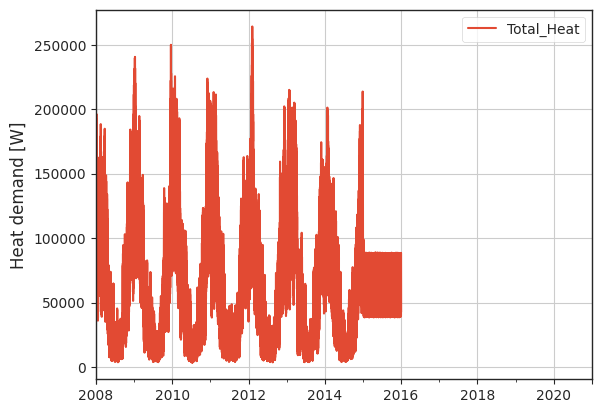

In [77]:
df_heat.plot()
plt.ylabel('Heat demand [W]')

<AxesSubplot: >

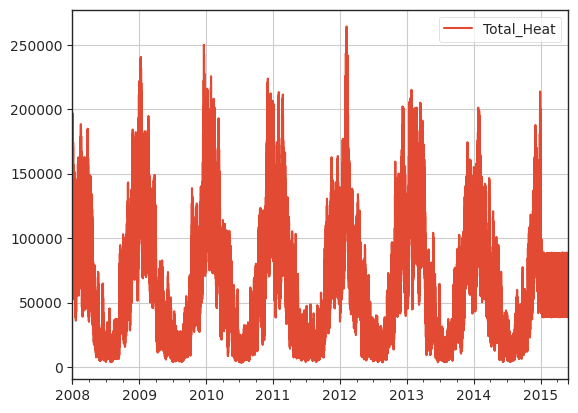

In [56]:
df_heat[:"2015-5"].plot() # missing or weird data after 2015

In [57]:
df_slice =  df_heat[:"2015-01-01"]

<AxesSubplot: >

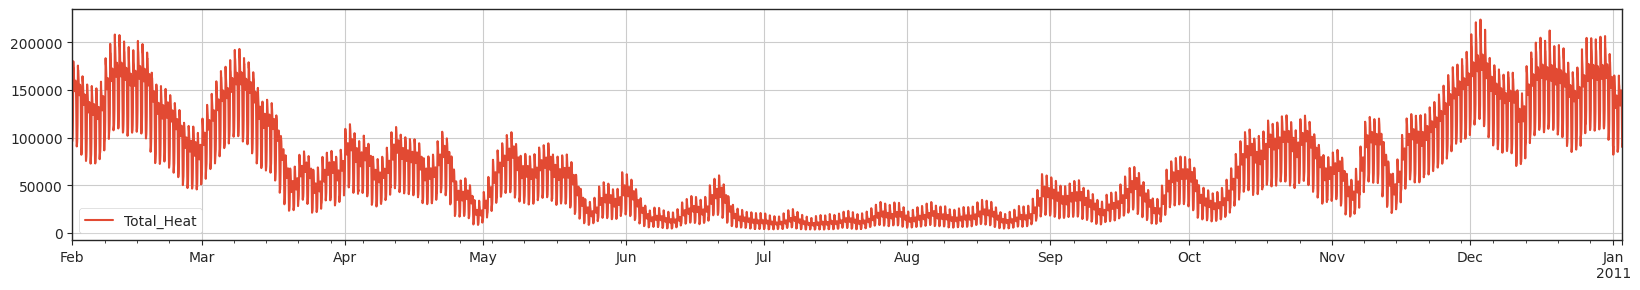

In [58]:
df_slice["2010-02-01":"2011-01-02"].plot(figsize=(20,3)) #outlier?

In [59]:
df_slice[df_slice["Total_Heat"]>400000.0]

,Total_Heat


In [60]:
df_slice.loc[df_slice["Total_Heat"]>400000.0] = np.NaN

In [61]:
df_slice.isna().sum()

Total_Heat    0
dtype: int64

In [62]:
!pip install holidays
import holidays
# get holiday list for Germany 
german_holidays = holidays.CountryHoliday(country='DE', prov=None)
german_holidays

holidays.country_holidays('DE')

,Total_Heat,Hour,Day,Month,Year,Weekday,Weekend,Holiday
2014-12-31 04:00:00+00:00,"154,670.00",4,31,12,2014,2,0,0
2014-12-31 05:00:00+00:00,"182,883.00",5,31,12,2014,2,0,0
2014-12-31 06:00:00+00:00,"178,247.00",6,31,12,2014,2,0,0
2014-12-31 07:00:00+00:00,"177,344.00",7,31,12,2014,2,0,0
2014-12-31 08:00:00+00:00,"170,094.00",8,31,12,2014,2,0,0
2014-12-31 09:00:00+00:00,"162,630.00",9,31,12,2014,2,0,0
2014-12-31 10:00:00+00:00,"155,954.00",10,31,12,2014,2,0,0
2014-12-31 11:00:00+00:00,"151,893.00",11,31,12,2014,2,0,0
2014-12-31 12:00:00+00:00,"150,371.00",12,31,12,2014,2,0,0
2014-12-31 13:00:00+00:00,"151,708.00",13,31,12,2014,2,0,0


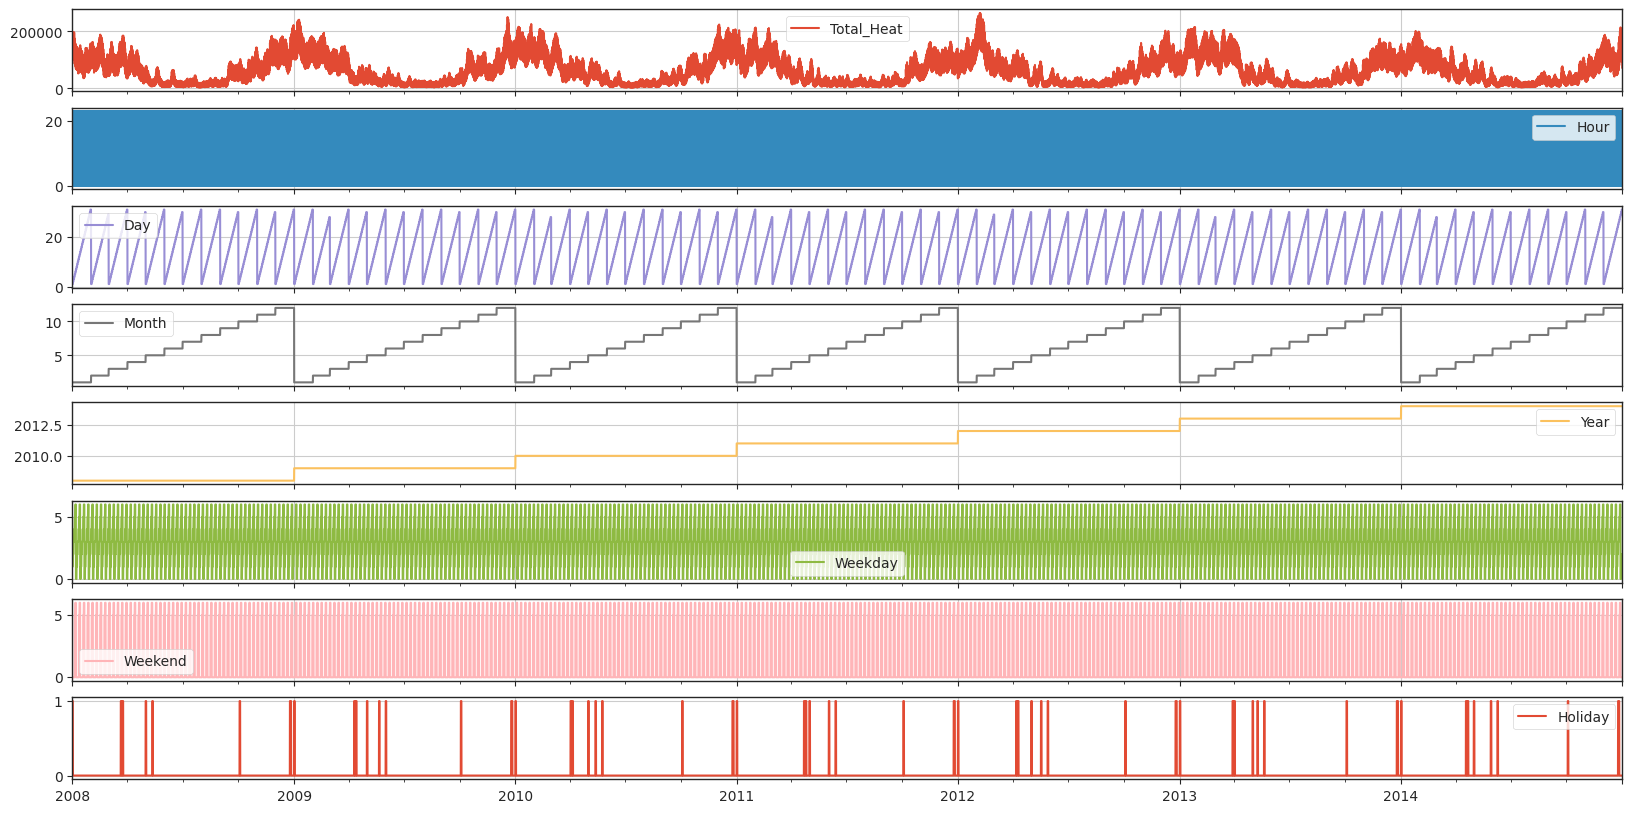

In [63]:
# create a standard dataframe to contain all timeseries data
df_standard = pd.DataFrame(index=df_heat.index)

df_standard['Total_Heat'] = df_heat['Total_Heat'].copy()
df_standard['Hour'] = df_heat.index.hour
df_standard['Day'] = df_heat.index.day
df_standard['Month'] = df_heat.index.month
df_standard['Year'] = df_heat.index.year
df_standard['Weekday'] = [date.weekday() for date in df_standard.index]
df_standard['Weekend'] = [date.weekday()*int(date.weekday()>4) for date in df_standard.index]
df_standard['Holiday'] = [int(date in german_holidays) for date in df_standard.index]
df_standard = df_standard['01-01-2008':'2014-12-31']
df_heat = df_heat['01-01-2008':'2014-12-31']

#save standard dataframe as seperate combined dataset
df_standard.to_csv(os.path.join(DATA_FOLDER, 'Dataset_Prep.csv'), index=True)
df_standard = pd.read_csv(os.path.join(DATA_FOLDER, 'Dataset_Prep.csv'))
df_standard = df_standard.set_index(pd.to_datetime(df_standard.iloc[:,0].values)).asfreq(freq='h').drop(df_standard.columns[0], axis=1)

df_standard.describe().transpose()
df_standard.plot(subplots=True, figsize=(20,10))
df_standard.tail(20)

In [64]:
input_names = ['Hour', 'Day', 'Month', 'Year', 'Weekday', 'Weekend', 'Holiday', 'Total_Heat']
                    
target_names = ['Total_Heat']

$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

<AxesSubplot: xlabel='Hour', ylabel='Total_Heat'>

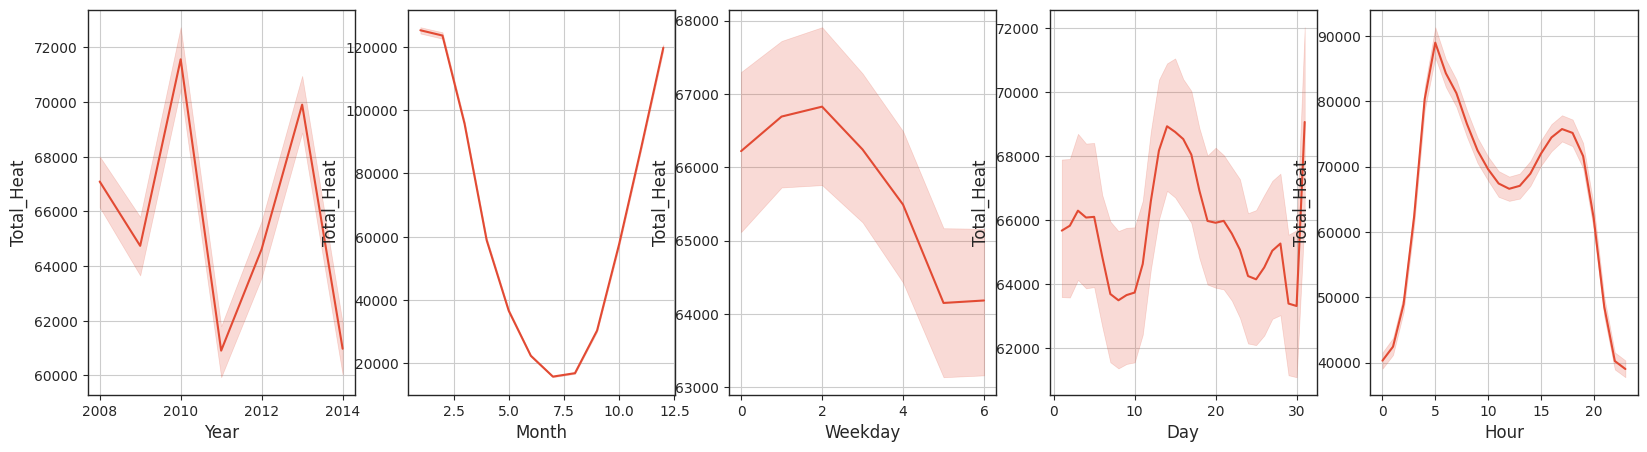

In [70]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=False)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['Total_Heat'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['Total_Heat'])
sns.lineplot(ax=axes[2], x=df_standard['Weekday'], y=df_standard['Total_Heat'])
sns.lineplot(ax=axes[3], x=df_standard['Day'], y=df_standard['Total_Heat'])
sns.lineplot(ax=axes[4], x=df_standard['Hour'], y=df_standard['Total_Heat'])
# plt.title('Total_Heat [MW]')

#### Pandas DataFrame types:

In [23]:
for x in df_standard.columns:
    print(x, type(df_standard[x]), df_standard[x].dtype)

Total_Heat <class 'pandas.core.series.Series'> float64
Hour <class 'pandas.core.series.Series'> int64
Day <class 'pandas.core.series.Series'> int64
Month <class 'pandas.core.series.Series'> int64
Year <class 'pandas.core.series.Series'> int64
Weekday <class 'pandas.core.series.Series'> int64
Weekend <class 'pandas.core.series.Series'> int64
Holiday <class 'pandas.core.series.Series'> int64


In [24]:
df_heat = df_heat.astype(float)

We can see the result now has a daily frequency. While some Time Seriods models will work without an explicit frequency, many will not. It is also helps to ensure we aren't missing important dates when summarizing and plotting the data. 

## Resampling 
We can now easily Resample our data at any desired frequency, using either the `asfreq` method or the `resample` method. The `asfreq` method assumes a default fill approach (which can be dangerous). The `resample` method allows this to be specified directly. which generates a __[resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html)__ object. To get to values, we need to specify an aggregation function if upsampling (moving to a lower frequency), or fill function if downsampling (moving to a higher frequency). This typically the sum or mean for upsampling, or interpolate for downsampling. We generate results for some common frequencies below:
### Upsampling (Moving to a longer period)

## Variable Transformations
For Time Series models, we may want to use transformed variables (log, difference, growth rate, etc). The example below illustrates how we might generate these variables in Pandas, using the dataset. 

### Stationarity Transformations
Concerns about Stationarity often lead to considering variable transformations. Some commonly-used transformation methods (Variable Differencing, Percentage Change, and Log) are implemented below. Because of Index has several levels here, these transformations can be done for each outcome variable with one line (the results could be joined together using the Pandas __[concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)__ method). 

### Rolling Averages and Windows
Another approach to transforming data involves looking at rolling averages. We will discuss this further in the Smoothing lessons. Here we set up rolling calculations for Mean and Standard Deviation, with variable window size. We will plot these a bit later.

Hourly Heating
                           Total_Heat  Total_Heat_%_Change  Total_Heat_Log  \
2008-01-01 00:00:00+00:00   98,086.00                  NaN           11.49   
2008-01-01 01:00:00+00:00  100,454.00                 0.02           11.52   
2008-01-01 02:00:00+00:00  107,183.00                 0.07           11.58   
2008-01-01 03:00:00+00:00  120,688.00                 0.13           11.70   
2008-01-01 04:00:00+00:00  158,569.00                 0.31           11.97   

                           Total_Heat_Log_Diff24  Total_Heat_Log_Diff24_Diff  \
2008-01-01 00:00:00+00:00                    NaN                         NaN   
2008-01-01 01:00:00+00:00                    NaN                         NaN   
2008-01-01 02:00:00+00:00                    NaN                         NaN   
2008-01-01 03:00:00+00:00                    NaN                         NaN   
2008-01-01 04:00:00+00:00                    NaN                         NaN   

                           Total_He

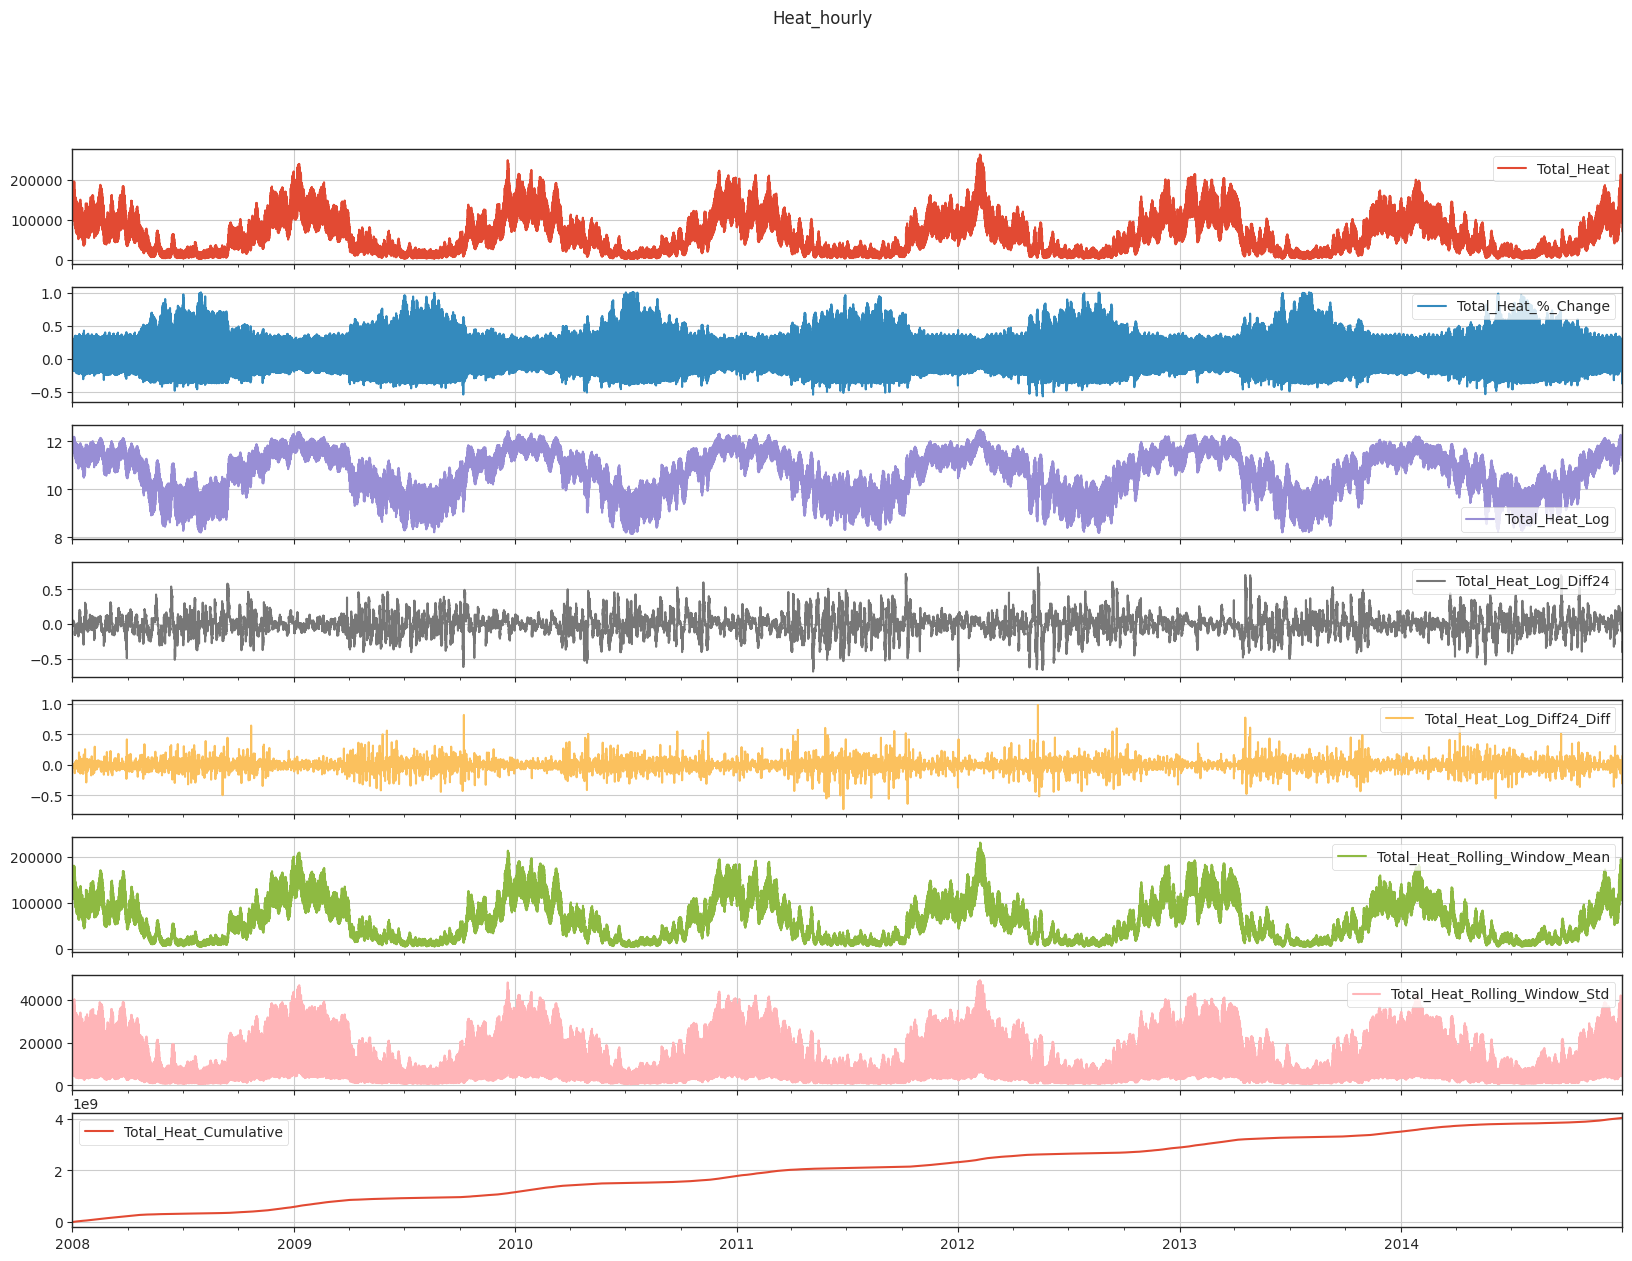

Daily Heating
                            Total_Heat  Total_Heat_%_Change  Total_Heat_Log  \
2008-01-01 00:00:00+00:00 3,537,151.00                  NaN           15.08   
2008-01-02 00:00:00+00:00 3,652,433.00                 0.03           15.11   
2008-01-03 00:00:00+00:00 3,728,215.00                 0.02           15.13   
2008-01-04 00:00:00+00:00 3,675,764.00                -0.01           15.12   
2008-01-05 00:00:00+00:00 3,214,703.00                -0.13           14.98   

                           Total_Heat_Log_Diff24  Total_Heat_Log_Diff24_Diff  \
2008-01-01 00:00:00+00:00                    NaN                         NaN   
2008-01-02 00:00:00+00:00                    NaN                         NaN   
2008-01-03 00:00:00+00:00                    NaN                         NaN   
2008-01-04 00:00:00+00:00                    NaN                         NaN   
2008-01-05 00:00:00+00:00                    NaN                         NaN   

                           Tot

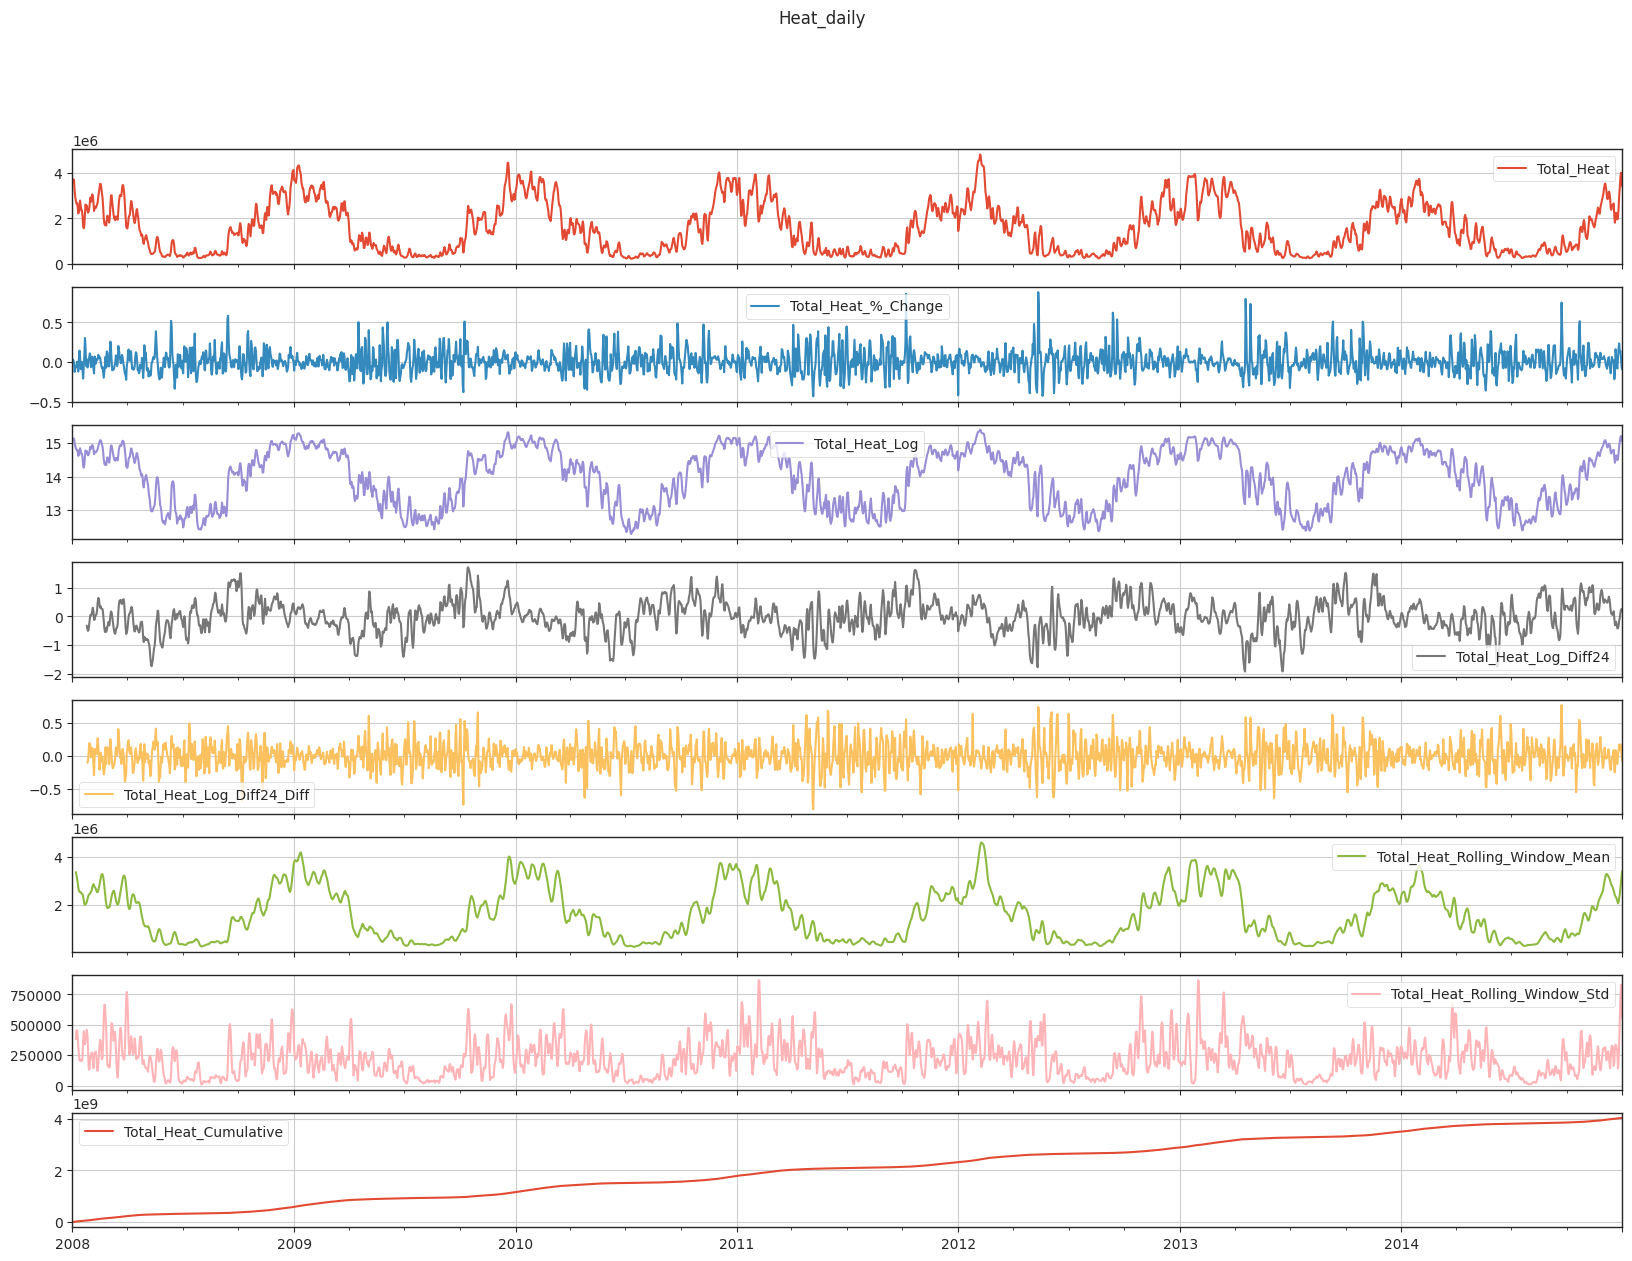

Weekly Heating
                             Total_Heat  Total_Heat_%_Change  Total_Heat_Log  \
2008-01-06 00:00:00+00:00 20,767,159.00                  NaN           16.85   
2008-01-13 00:00:00+00:00 17,763,049.00                -0.14           16.69   
2008-01-20 00:00:00+00:00 15,357,360.00                -0.14           16.55   
2008-01-27 00:00:00+00:00 16,196,104.00                 0.05           16.60   
2008-02-03 00:00:00+00:00 19,018,481.00                 0.17           16.76   

                           Total_Heat_Rolling_Window_Mean  \
2008-01-06 00:00:00+00:00                             NaN   
2008-01-13 00:00:00+00:00                             NaN   
2008-01-20 00:00:00+00:00                             NaN   
2008-01-27 00:00:00+00:00                   17,520,918.00   
2008-02-03 00:00:00+00:00                   17,083,748.50   

                           Total_Heat_Rolling_Window_Std  \
2008-01-06 00:00:00+00:00                            NaN   
2008-01-13 00:00:

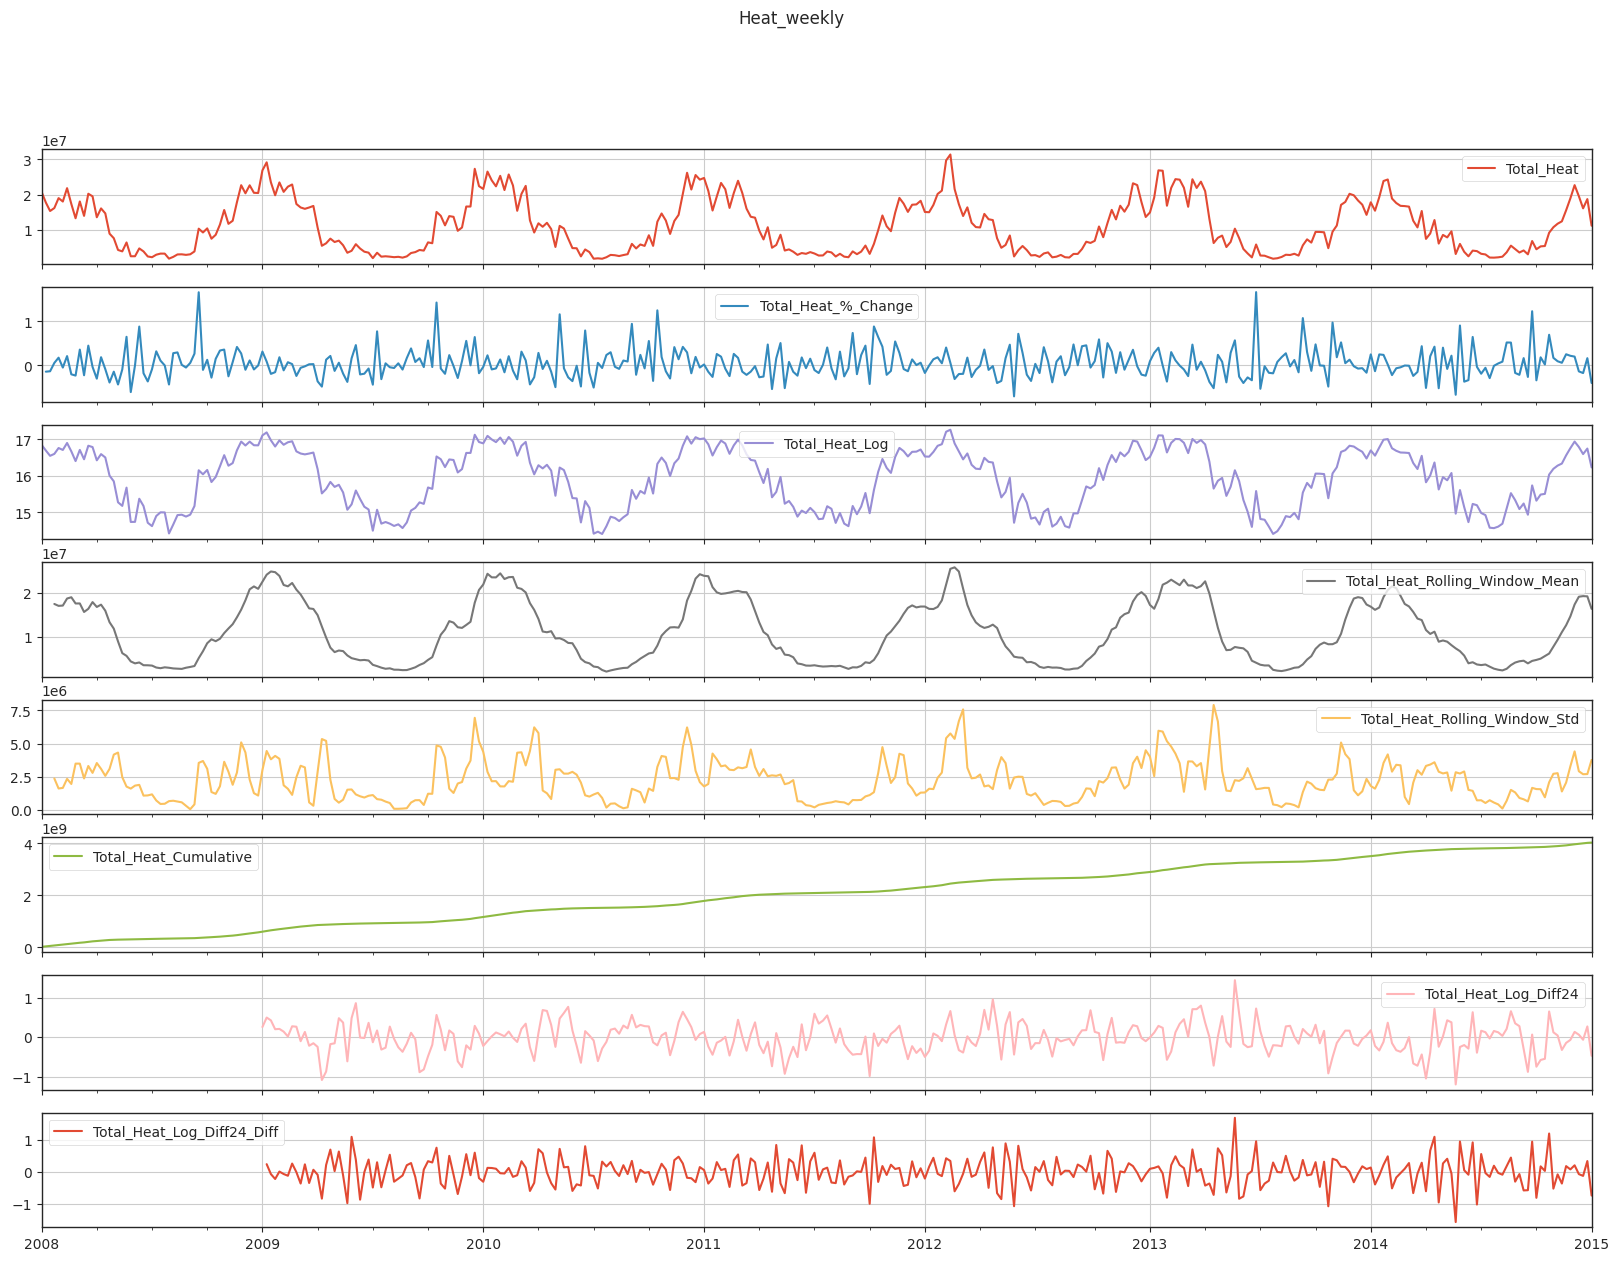

Monthly Heating
                             Total_Heat  Total_Heat_%_Change  Total_Heat_Log  \
2008-01-31 00:00:00+00:00 80,438,391.00                  NaN           18.20   
2008-02-29 00:00:00+00:00 75,466,953.00                -0.06           18.14   
2008-03-31 00:00:00+00:00 77,119,467.00                 0.02           18.16   
2008-04-30 00:00:00+00:00 54,736,297.00                -0.29           17.82   
2008-05-31 00:00:00+00:00 21,448,388.00                -0.61           16.88   

                           Total_Heat_Rolling_Window_Mean  \
2008-01-31 00:00:00+00:00                             NaN   
2008-02-29 00:00:00+00:00                             NaN   
2008-03-31 00:00:00+00:00                             NaN   
2008-04-30 00:00:00+00:00                             NaN   
2008-05-31 00:00:00+00:00                             NaN   

                           Total_Heat_Rolling_Window_Std  \
2008-01-31 00:00:00+00:00                            NaN   
2008-02-29 00:00

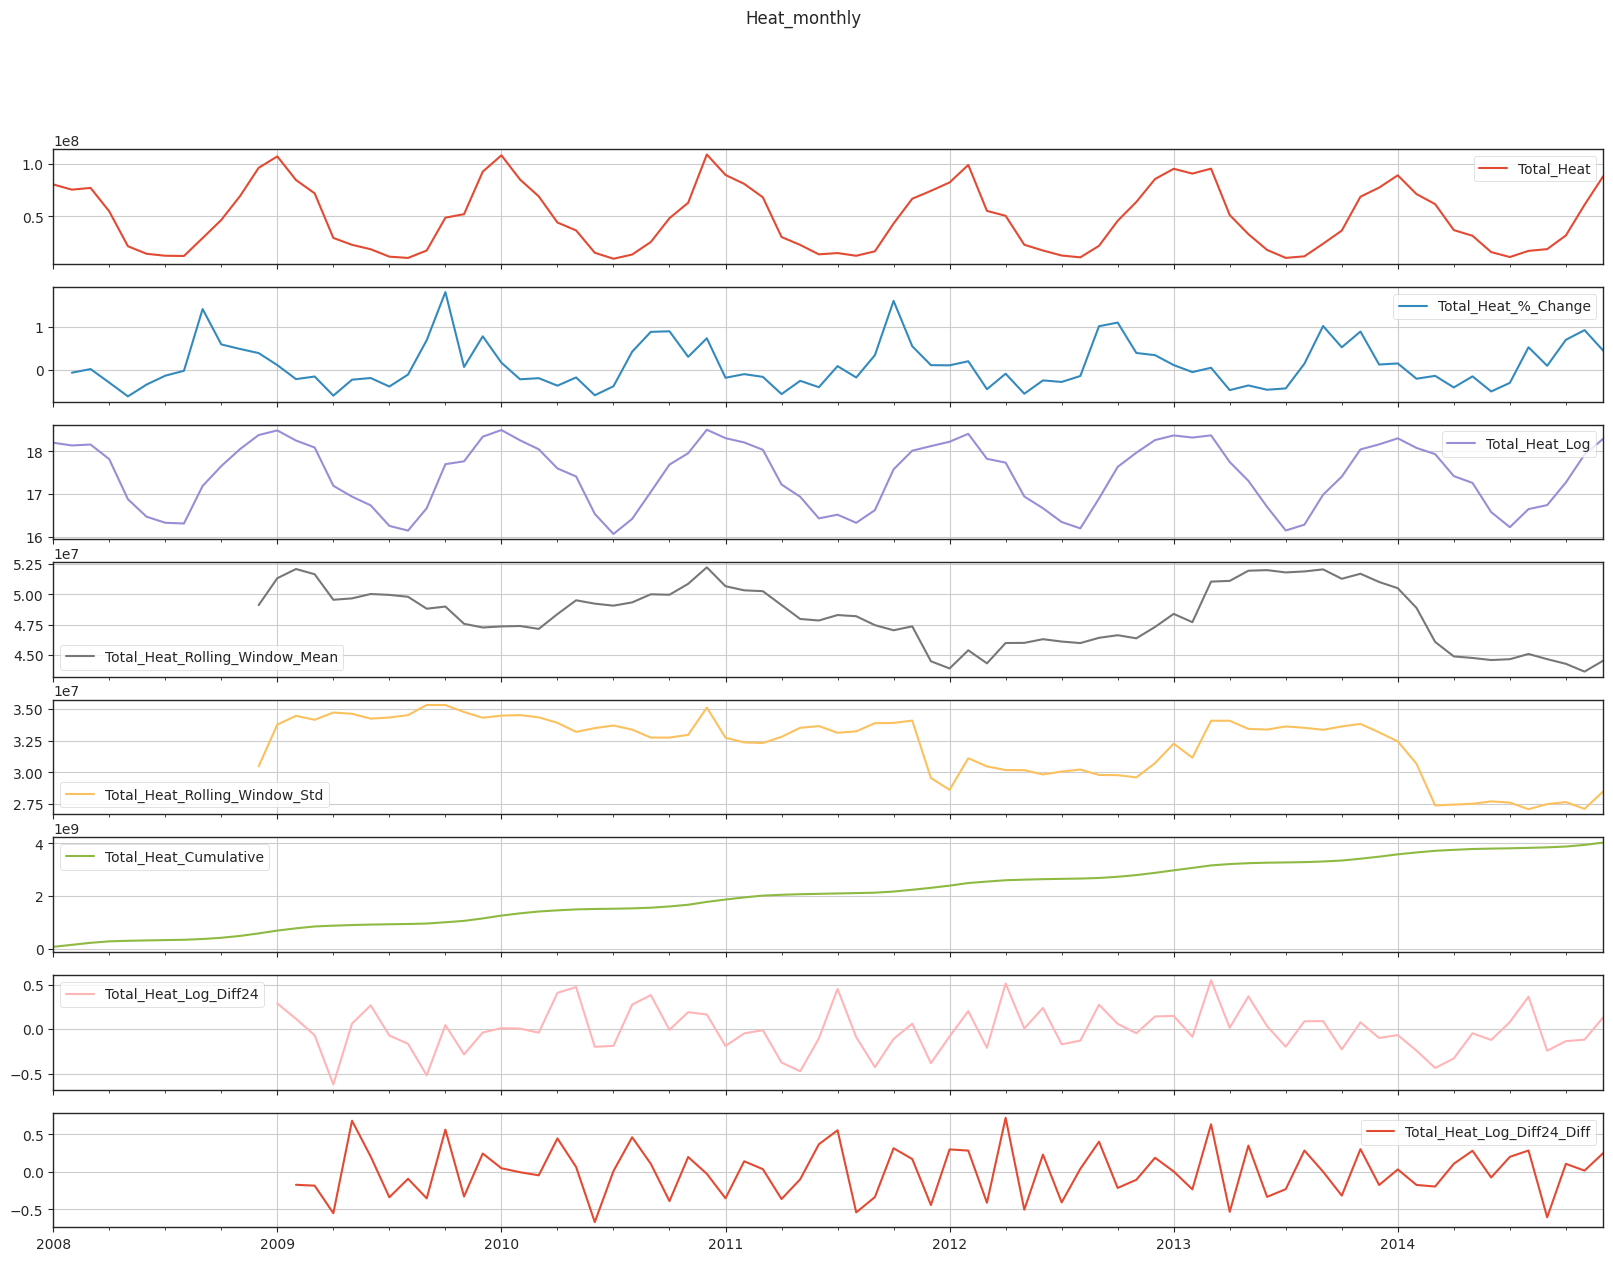

Quarterly Heating
                              Total_Heat  Total_Heat_%_Change  Total_Heat_Log  \
2008-03-31 00:00:00+00:00 233,024,811.00                  NaN           19.27   
2008-06-30 00:00:00+00:00  90,434,816.00                -0.61           18.32   
2008-09-30 00:00:00+00:00  53,815,031.00                -0.40           17.80   
2008-12-31 00:00:00+00:00 212,079,346.00                 2.94           19.17   
2009-03-31 00:00:00+00:00 263,735,553.00                 0.24           19.39   

                           Total_Heat_Rolling_Window_Mean  \
2008-03-31 00:00:00+00:00                             NaN   
2008-06-30 00:00:00+00:00                             NaN   
2008-09-30 00:00:00+00:00                             NaN   
2008-12-31 00:00:00+00:00                  147,338,501.00   
2009-03-31 00:00:00+00:00                  155,016,186.50   

                           Total_Heat_Rolling_Window_Std  \
2008-03-31 00:00:00+00:00                            NaN   
2008-06-

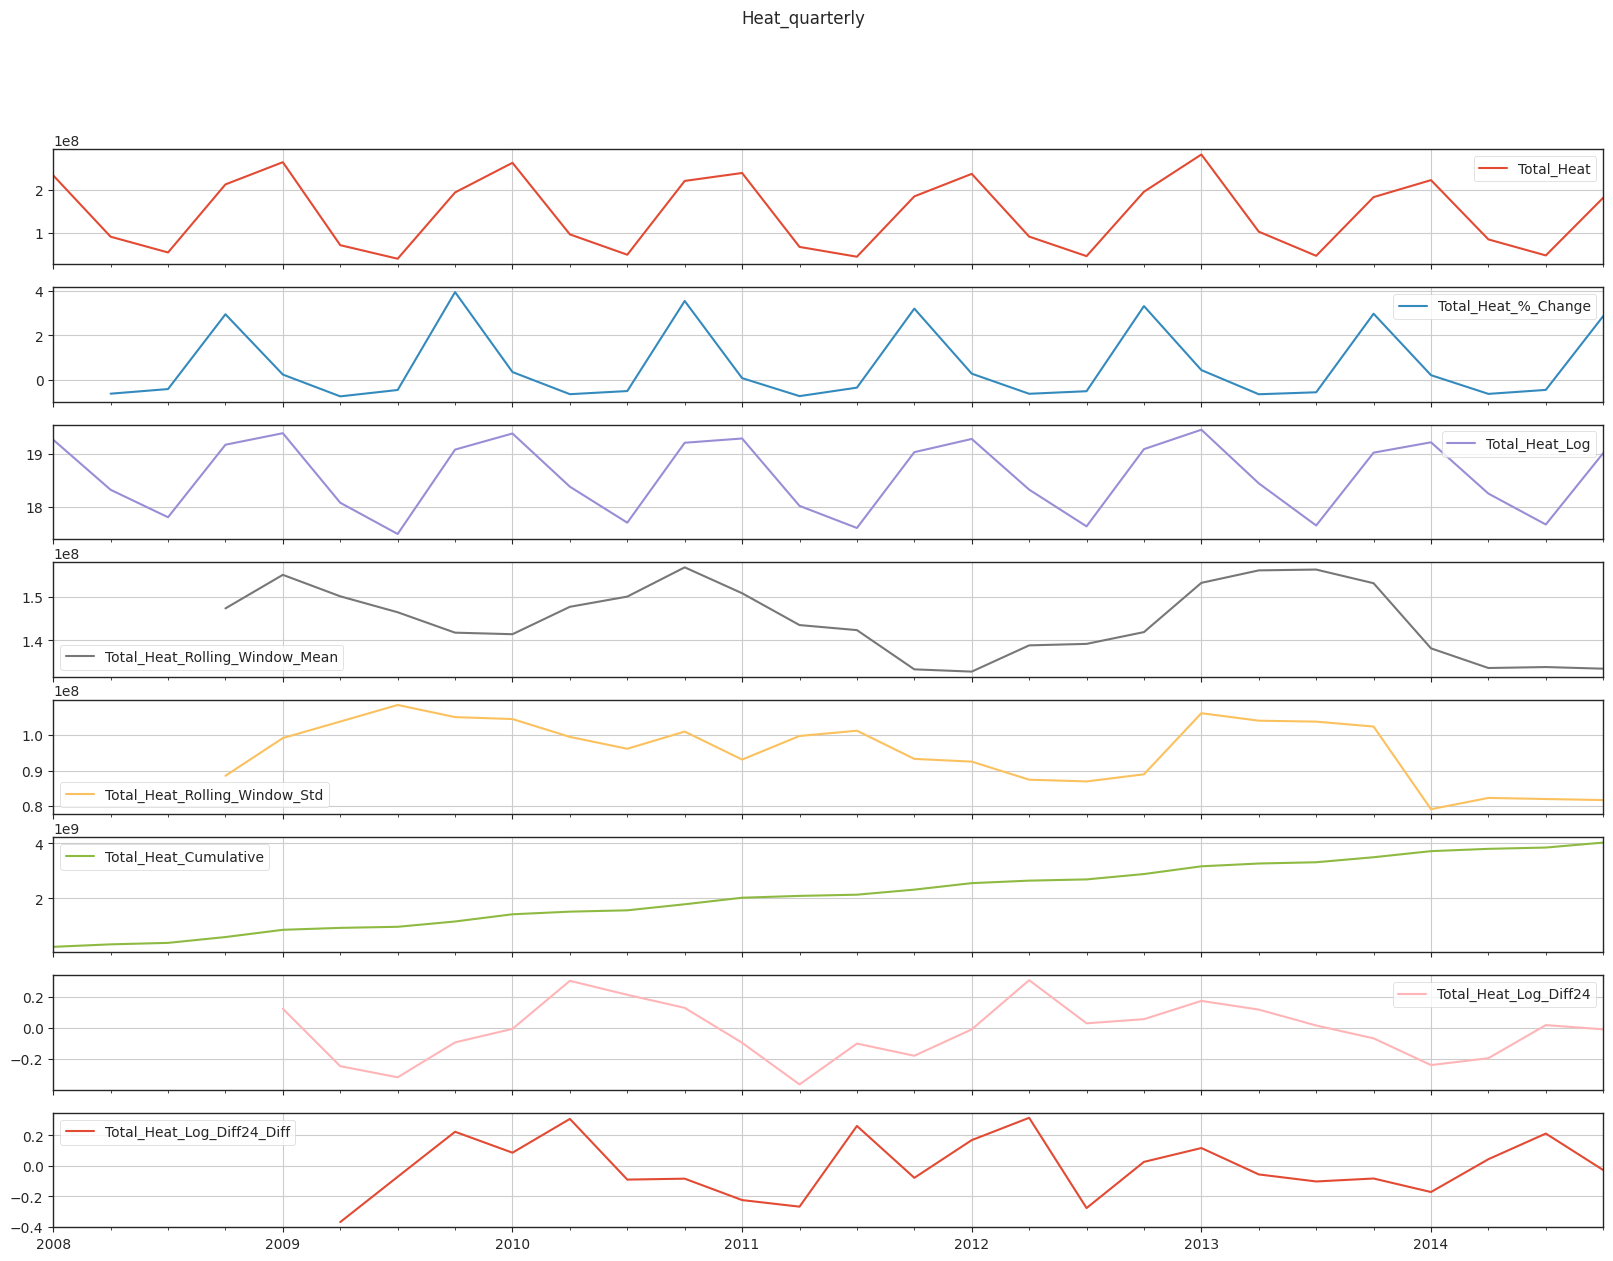

Annual Heating
                              Total_Heat  Total_Heat_%_Change  Total_Heat_Log  \
2008-12-31 00:00:00+00:00 589,354,004.00                  NaN           20.19   
2009-12-31 00:00:00+00:00 567,126,596.00                -0.04           20.16   
2010-12-31 00:00:00+00:00 626,927,661.00                 0.11           20.26   
2011-12-31 00:00:00+00:00 533,536,097.00                -0.15           20.10   
2012-12-31 00:00:00+00:00 567,647,191.00                 0.06           20.16   

                           Total_Heat_Rolling_Window_Mean  \
2008-12-31 00:00:00+00:00                             NaN   
2009-12-31 00:00:00+00:00                  578,240,300.00   
2010-12-31 00:00:00+00:00                  597,027,128.50   
2011-12-31 00:00:00+00:00                  580,231,879.00   
2012-12-31 00:00:00+00:00                  550,591,644.00   

                           Total_Heat_Rolling_Window_Std  \
2008-12-31 00:00:00+00:00                            NaN   
2009-12-31 

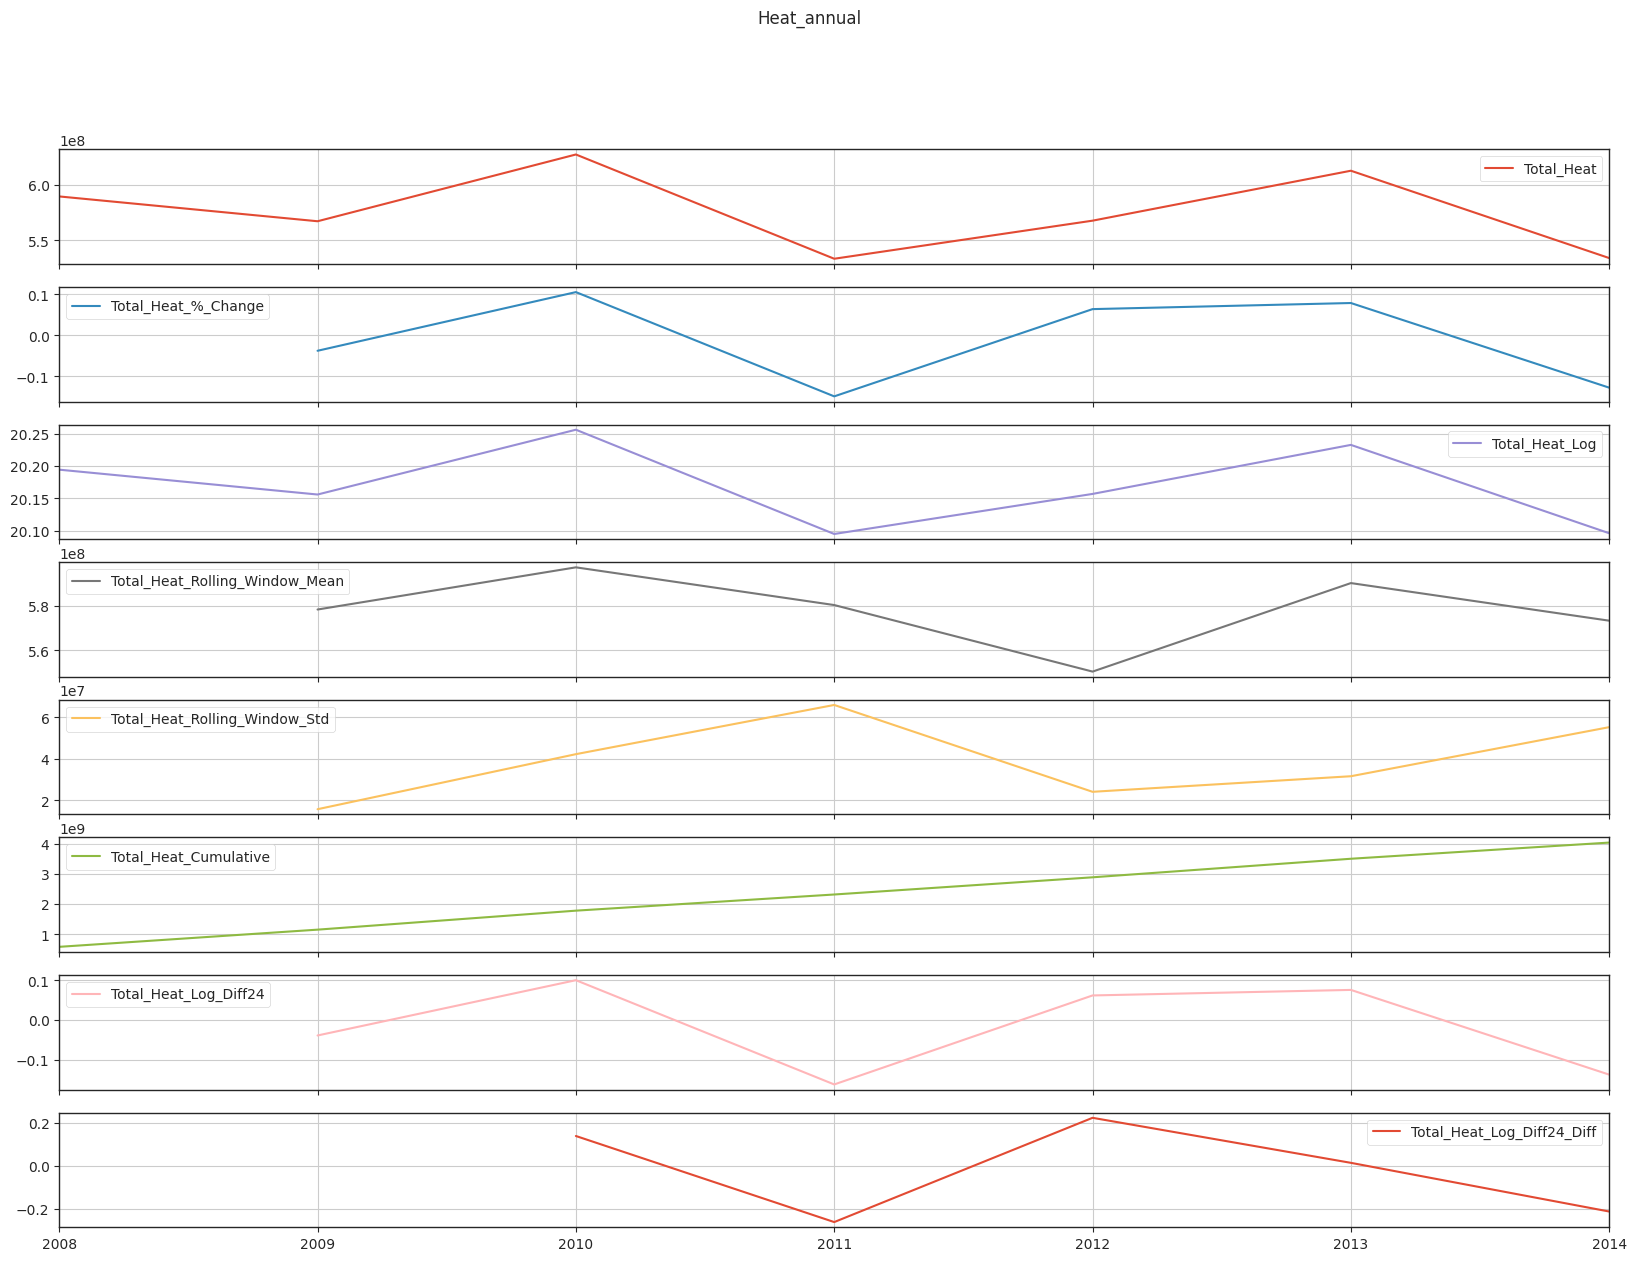

In [25]:
heat_hourly = df_heat  #.resample('H').sum()
heat_hourly = heat_hourly.join(heat_hourly.pct_change().add_suffix('_%_Change')).join(np.log(1 +  heat_hourly).add_suffix('_Log'))
heat_hourly['Total_Heat_Log_Diff24'] = heat_hourly['Total_Heat_Log'].diff(periods=24)
heat_hourly['Total_Heat_Log_Diff24_Diff'] = heat_hourly['Total_Heat_Log_Diff24'].diff()
heat_hourly['Total_Heat_Rolling_Window_Mean'] = heat_hourly['Total_Heat'].rolling(window=7).mean()
heat_hourly['Total_Heat_Rolling_Window_Std'] = heat_hourly['Total_Heat'].rolling(window=7).std()
heat_hourly['Total_Heat_Cumulative'] = heat_hourly['Total_Heat'].cumsum()
print('Hourly Heating')
print(heat_hourly.head(), '\n')
heat_hourly.plot(subplots=True, figsize=(20,14), title='Heat_hourly'); plt.show()


heat_daily = df_heat.resample('D').sum()
heat_daily = heat_daily.join(heat_daily.pct_change().add_suffix('_%_Change')).join(np.log(1 +  heat_daily).add_suffix('_Log'))
heat_daily['Total_Heat_Log_Diff24'] = heat_daily['Total_Heat_Log'].diff(periods=24)
heat_daily['Total_Heat_Log_Diff24_Diff'] = heat_daily['Total_Heat_Log_Diff24'].diff()
heat_daily['Total_Heat_Rolling_Window_Mean'] = heat_daily['Total_Heat'].rolling(window=7).mean()
heat_daily['Total_Heat_Rolling_Window_Std'] = heat_daily['Total_Heat'].rolling(window=7).std()
heat_daily['Total_Heat_Cumulative'] = heat_daily['Total_Heat'].cumsum()
print('Daily Heating')
print(heat_daily.head(), '\n')
heat_daily.plot(subplots=True, figsize=(20,14), title='Heat_daily'); plt.show()

heat_weekly = df_heat.resample('W').sum()
heat_weekly = heat_weekly.join(heat_weekly.pct_change().add_suffix('_%_Change')).join(np.log(1 +  heat_weekly).add_suffix('_Log'))
heat_weekly['Total_Heat_Rolling_Window_Mean'] = heat_weekly['Total_Heat'].rolling(window=4).mean()
heat_weekly['Total_Heat_Rolling_Window_Std'] = heat_weekly['Total_Heat'].rolling(window=4).std()
heat_weekly['Total_Heat_Cumulative'] = heat_weekly['Total_Heat'].cumsum()
heat_weekly['Total_Heat_Log_Diff24'] = heat_weekly['Total_Heat_Log'].diff(periods=52)
heat_weekly['Total_Heat_Log_Diff24_Diff'] = heat_weekly['Total_Heat_Log_Diff24'].diff()
print('Weekly Heating')
print(heat_weekly.head(), '\n')
heat_weekly.plot(subplots=True, figsize=(20,14), title='Heat_weekly'); plt.show()

heat_monthly = df_heat.resample('M').sum()
heat_monthly = heat_monthly.join(heat_monthly.pct_change().add_suffix('_%_Change')).join(np.log(1 +  heat_monthly).add_suffix('_Log'))
heat_monthly['Total_Heat_Rolling_Window_Mean'] = heat_monthly['Total_Heat'].rolling(window=12).mean()
heat_monthly['Total_Heat_Rolling_Window_Std'] = heat_monthly['Total_Heat'].rolling(window=12).std()
heat_monthly['Total_Heat_Cumulative'] = heat_monthly['Total_Heat'].cumsum()
heat_monthly['Total_Heat_Log_Diff24'] = heat_monthly['Total_Heat_Log'].diff(periods=12)
heat_monthly['Total_Heat_Log_Diff24_Diff'] = heat_monthly['Total_Heat_Log_Diff24'].diff()
print('Monthly Heating')
print(heat_monthly.head(), '\n')
heat_monthly.plot(subplots=True, figsize=(20,14), title='Heat_monthly'); plt.show()

heat_quarterly = df_heat.resample('Q').sum()
heat_quarterly = heat_quarterly.join(heat_quarterly.pct_change().add_suffix('_%_Change')).join(np.log(1 +  heat_quarterly).add_suffix('_Log'))
heat_quarterly['Total_Heat_Rolling_Window_Mean'] = heat_quarterly['Total_Heat'].rolling(window=4).mean()
heat_quarterly['Total_Heat_Rolling_Window_Std'] = heat_quarterly['Total_Heat'].rolling(window=4).std()
heat_quarterly['Total_Heat_Cumulative'] = heat_quarterly['Total_Heat'].cumsum()
heat_quarterly['Total_Heat_Log_Diff24'] = heat_quarterly['Total_Heat_Log'].diff(periods=4)
heat_quarterly['Total_Heat_Log_Diff24_Diff'] = heat_quarterly['Total_Heat_Log_Diff24'].diff()
print('Quarterly Heating')
print(heat_quarterly.head(), '\n')
heat_quarterly.plot(subplots=True, figsize=(20,14), title='Heat_quarterly'); plt.show()

heat_annual = df_heat.resample('Y').sum()
heat_annual = heat_annual.join(heat_annual.pct_change().add_suffix('_%_Change')).join(np.log(1 +  heat_annual).add_suffix('_Log'))
heat_annual['Total_Heat_Rolling_Window_Mean'] = heat_annual['Total_Heat'].rolling(window=2).mean()
heat_annual['Total_Heat_Rolling_Window_Std'] = heat_annual['Total_Heat'].rolling(window=2).std()
heat_annual['Total_Heat_Cumulative'] = heat_annual['Total_Heat'].cumsum()
heat_annual['Total_Heat_Log_Diff24'] = heat_annual['Total_Heat_Log'].diff(periods=1)
heat_annual['Total_Heat_Log_Diff24_Diff'] = heat_annual['Total_Heat_Log_Diff24'].diff()
print('Annual Heating')
print(heat_annual.head())
heat_annual.plot(subplots=True, figsize=(20,14), title='Heat_annual'); plt.show()

## Time Series Visualizations
There are a number of packages to help analyze Time Series data and create relevant plots. One example is __[statsmodels](https://www.statsmodels.org/stable/graphics.html#time-series-plots)__, which includes a number of methods for plotting Time Series-specific visualizations:
- __[plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf)__: Plot of the Autocorrelation Function
- __[plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf)__: Plot of the Partial Autocorrelation Function
- __[month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot)__: Seasonal Plot for Monthly Data
- __[quarter_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html#statsmodels.graphics.tsaplots.quarter_plot)__: Seasonal Plot for Quarterly Data

Some examples are illustrated below:


Hourly data Autocorrelation Plots
Daily data Autocorrelation Plots
Weekly data Autocorrelation Plots
Monthly data Autocorrelation Plots
Quarterly data Autocorrelation Plots
Annual data Autocorrelation Plots


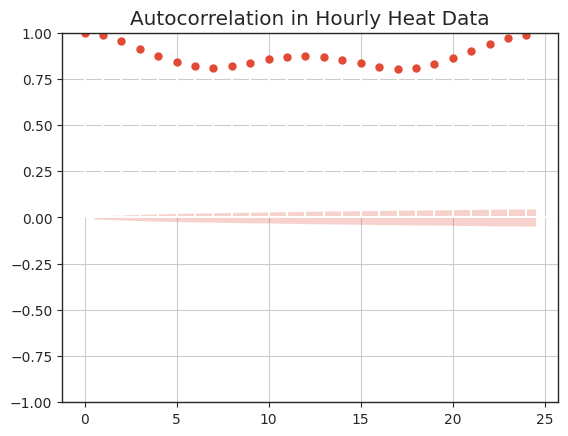

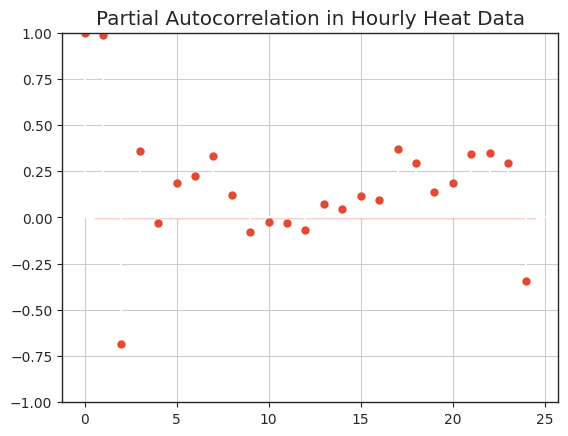

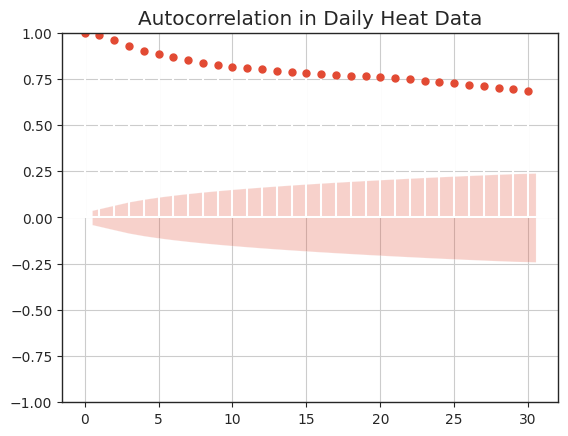

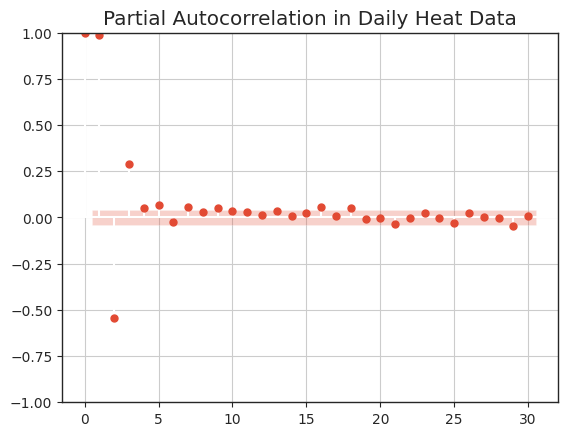

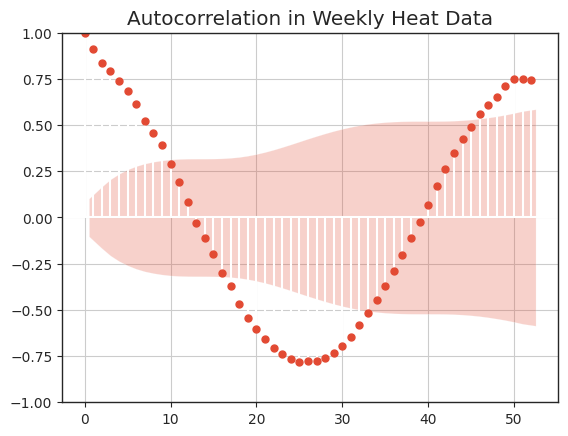

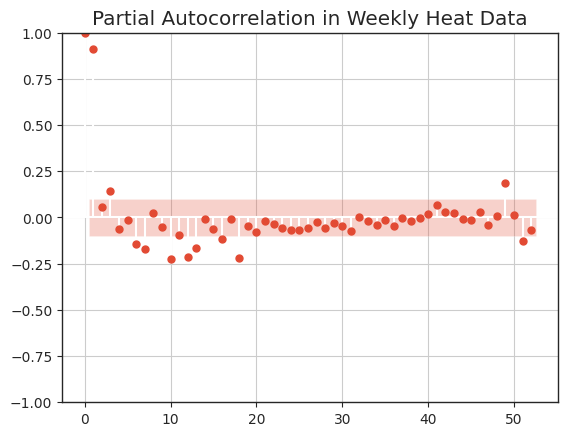

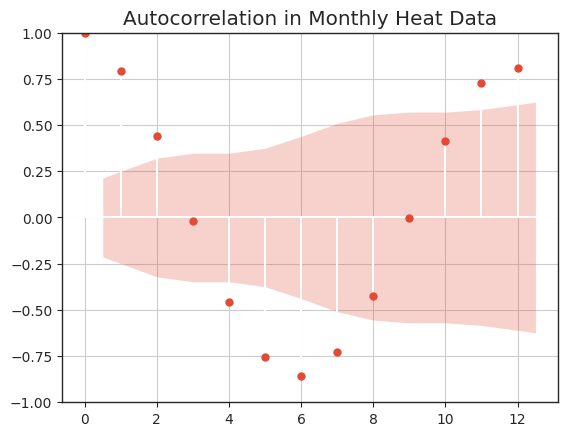

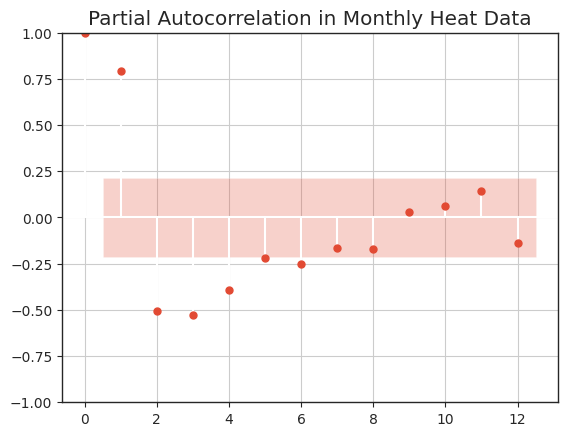

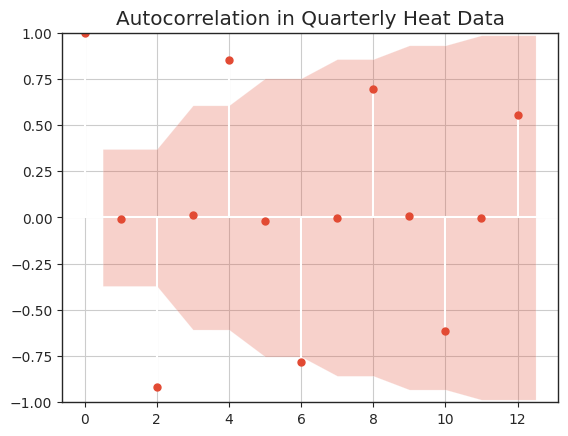

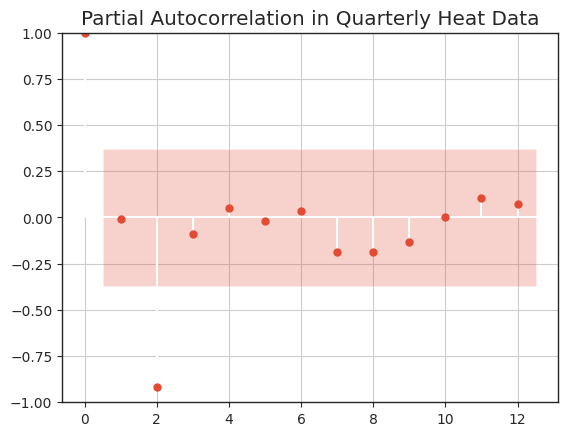

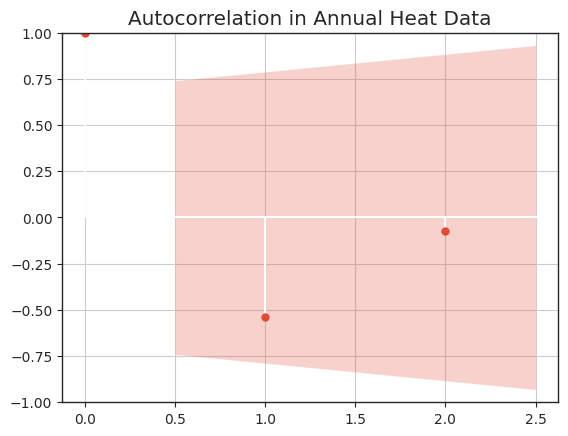

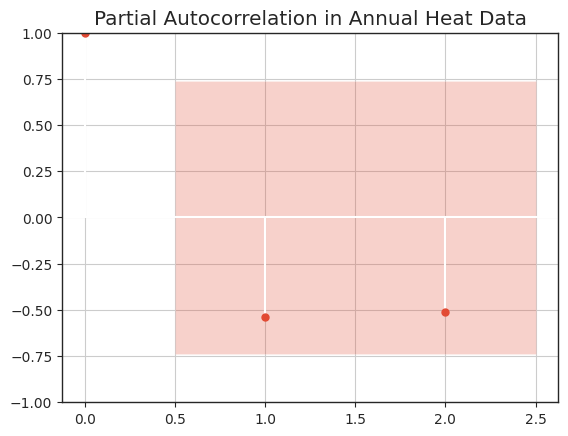

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

print('Hourly data Autocorrelation Plots')
acf_plot = plot_acf(heat_hourly['Total_Heat'], lags=24, title='Autocorrelation in Hourly Heat Data')
pacf_plot = plot_pacf(heat_hourly['Total_Heat'], lags=24, title='Partial Autocorrelation in Hourly Heat Data')

print('Daily data Autocorrelation Plots')
acf_plot = plot_acf(heat_daily['Total_Heat'], lags=30, title='Autocorrelation in Daily Heat Data')
pacf_plot = plot_pacf(heat_daily['Total_Heat'], lags=30, title='Partial Autocorrelation in Daily Heat Data')

print('Weekly data Autocorrelation Plots')
acf_plot = plot_acf(heat_weekly['Total_Heat'], lags=52, title='Autocorrelation in Weekly Heat Data')
pacf_plot = plot_pacf(heat_weekly['Total_Heat'], lags=52, title='Partial Autocorrelation in Weekly Heat Data')

print('Monthly data Autocorrelation Plots')
acf_plot = plot_acf(heat_monthly['Total_Heat'], lags=12, title='Autocorrelation in Monthly Heat Data')
pacf_plot = plot_pacf(heat_monthly['Total_Heat'], lags=12, title='Partial Autocorrelation in Monthly Heat Data')

print('Quarterly data Autocorrelation Plots')
acf_plot = plot_acf(heat_quarterly['Total_Heat'], lags=12, title='Autocorrelation in Quarterly Heat Data')
pacf_plot = plot_pacf(heat_quarterly['Total_Heat'], lags=12, title='Partial Autocorrelation in Quarterly Heat Data')


print('Annual data Autocorrelation Plots')
acf_plot = plot_acf(heat_annual['Total_Heat'], lags=2, title='Autocorrelation in Annual Heat Data')
pacf_plot = plot_pacf(heat_annual['Total_Heat'], lags=2, title='Partial Autocorrelation in Annual Heat Data')


# only 2 most recent values apear significant

Hourly data Autocorrelation Plots


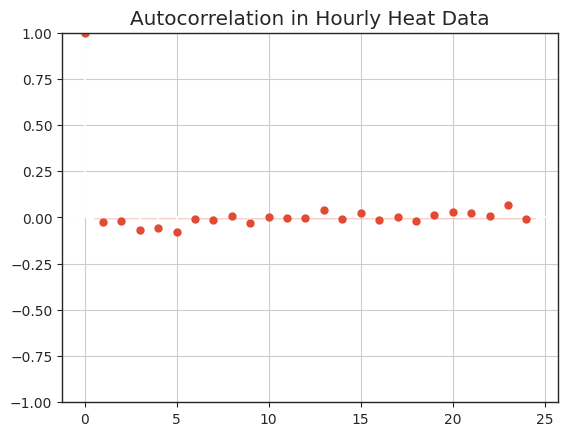

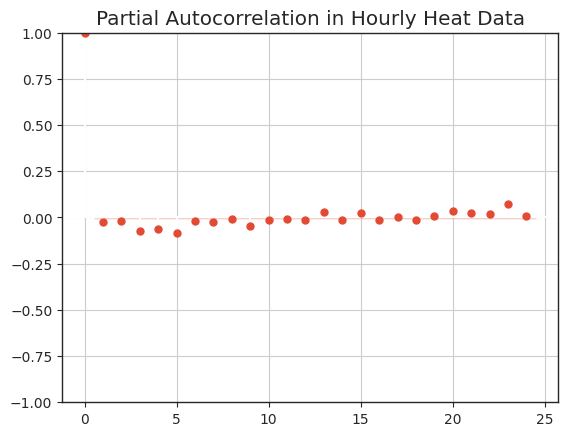

In [27]:
print('Hourly data Autocorrelation Plots')
acf_plot = plot_acf(heat_hourly['Total_Heat_Log_Diff24_Diff'].dropna(), lags=24, title='Autocorrelation in Hourly Heat Data')
pacf_plot = plot_pacf(heat_hourly['Total_Heat_Log_Diff24_Diff'].dropna(), lags=24, title='Partial Autocorrelation in Hourly Heat Data')
